# CS547 Group 17
Carlos Cuellar, Yuncong Geng, Kangcheng Lin, Peter Thompson
## HW6

In [1]:
import os
import numpy as np
import pandas
import time
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import functional as F

In [3]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}

# Problem 1

In [4]:
def func(x):
    return x**3-0.5*x**2


## 1) generate input data
Generate 1000 data points for x ranging from -5 to 5. 

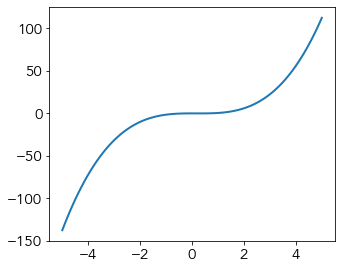

In [5]:
x = np.linspace(-5,5,100)
y = func(x)

plt.rcParams["figure.figsize"] = (5,4)
plt.rcParams.update({'font.size': 15})
plt.plot(x,y,**plotStyles)
plt.tight_layout()

In [7]:
inputs = Variable(torch.Tensor(x.reshape(100,1)))
labels = Variable(torch.Tensor(y.reshape(100,1)))

## 2) explore number of layers and layer sizes with sigmoidal activation

In [8]:
class SigmoidalFeedForward(nn.Module): 
    def __init__(self,layers_size,num_layers): 
        super(SigmoidalFeedForward, self).__init__() 
        self.layers_size = layers_size;
        self.num_layers = num_layers;
        self.layers = nn.ModuleList([nn.Linear(1, layers_size)])
        self.layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, self.num_layers-1)])
        self.layers.append(nn.Linear(layers_size, 1))
        self.relu=torch.nn.Sigmoid()

    def forward(self, x):
        out = x
        for i in range(len(self.layers)-1):
            out = self.layers[i](out)
            out=self.relu(out)
        out = self.layers[-1](out)
        return out

In [52]:
layer_size_list = [1,5,10,15,20,30];

In [74]:
def main_training(num_layers, learningRate, MAX_iter, make_plot):
    n_epoch_list = [];
    time_list = [];
    
    if make_plot == 1:
        plt.figure(figsize=(12,10));
        j = 1;
    
    for layers_size in layer_size_list:
        print('layers_size='+str(layers_size))
        model=SigmoidalFeedForward(layers_size,num_layers)
        Loss = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
        tic=time.time();
        losses=np.array([])
        n_epoch = MAX_iter;
        for ctr in range(MAX_iter):
            optimizer.zero_grad()
            outputs = model(inputs)
            lossvalue = Loss(outputs, labels)
            losses = np.append(losses, lossvalue.detach().numpy())
            if (np.mean(losses[-100:])<10):
                n_epoch = ctr;
                break;
            else:
                lossvalue.backward()
                optimizer.step()
        toc=time.time();
        time_list.append(toc-tic); 
        n_epoch_list.append(n_epoch)
        print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))  

        xdata = np.arange(0,n_epoch,20);
        ydata = losses[::20];
        min_len = min(len(xdata),len(ydata))
        xdata = xdata[0:min_len]
        ydata = ydata[0:min_len]
        if make_plot == 1:
            plt.subplot(4,3,j)
            plt.title('internal layer size='+str(layers_size))
            plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
            plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
            plt.plot(xdata,ydata,**plotStyles)
            plt.xlabel('epoch')
            plt.ylabel('loss (MSE)')
        
            plt.subplot(4,3,6+j)
            outputs=model(inputs)
            plt.plot(x,y,linewidth=2,label='raw')
            plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
            plt.legend(ncol=2)
            plt.title('internal layer size='+str(layers_size))
        
            j = j+1;
        plt.tight_layout()
    return (n_epoch_list,time_list)
        

### test on two-layer network
The learning rate is set to be 0.001. 

The iteration stops when the loss is smaller than 10, or when the maximum number of iterations (20000) is reached. 

In [75]:
learningRate = 0.001;
MAX_iter=20000;

layers_size=1
#epoch=20000; loss=752
layers_size=5
#epoch=14253; loss=9
layers_size=10
#epoch=9284; loss=9
layers_size=15
#epoch=7666; loss=9
layers_size=20
#epoch=6449; loss=9
layers_size=30
#epoch=5439; loss=9


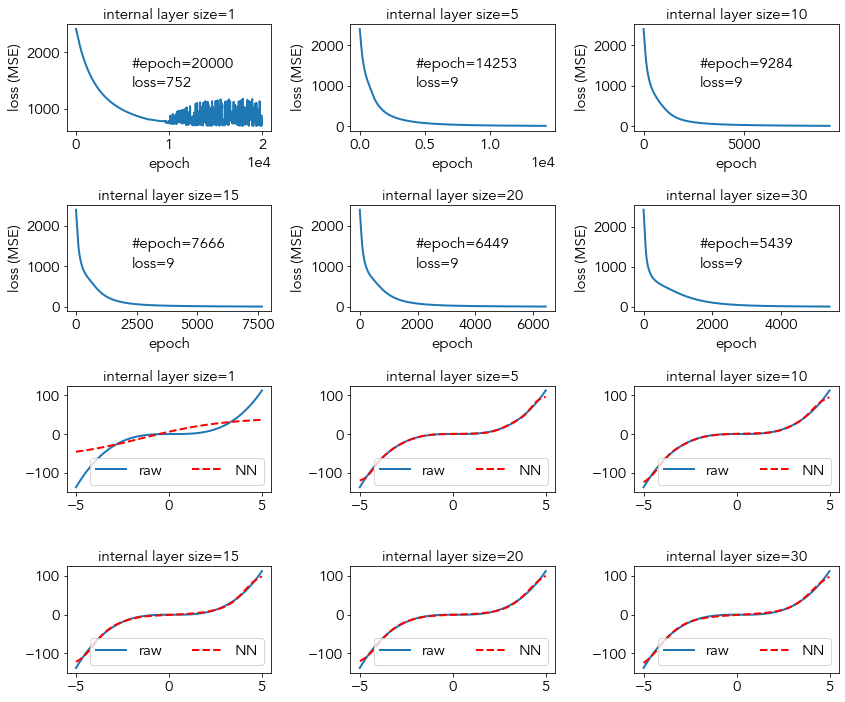

In [76]:
torch.manual_seed(1)
num_layers = 2;

(n_epoch_list1,time_list1) = main_training(num_layers, learningRate, MAX_iter,1); 


In [78]:
torch.manual_seed(1)

num_layers = 2;

n_epoch_list1 = np.zeros((10,6));
time_list1 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list1[n],time_list1[n]) = main_training(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=752
layers_size=5
#epoch=14253; loss=9
layers_size=10
#epoch=9284; loss=9
layers_size=15
#epoch=7666; loss=9
layers_size=20
#epoch=6449; loss=9
layers_size=30
#epoch=5439; loss=9
layers_size=1
#epoch=20000; loss=765
layers_size=5
#epoch=19778; loss=9
layers_size=10
#epoch=9280; loss=9
layers_size=15
#epoch=7681; loss=9
layers_size=20
#epoch=6524; loss=9
layers_size=30
#epoch=5122; loss=9
layers_size=1
#epoch=20000; loss=779
layers_size=5
#epoch=18665; loss=9
layers_size=10
#epoch=9711; loss=9
layers_size=15
#epoch=8709; loss=9
layers_size=20
#epoch=6313; loss=9
layers_size=30
#epoch=5458; loss=9
layers_size=1
#epoch=20000; loss=808
layers_size=5
#epoch=14284; loss=9
layers_size=10
#epoch=9498; loss=9
layers_size=15
#epoch=7274; loss=9
layers_size=20
#epoch=6854; loss=9
layers_size=30
#epoch=5457; loss=9
layers_size=1
#epoch=20000; loss=704
layers_size=5
#epoch=18446; loss=9
layers_size=10
#epoch=9064; loss=9
layers_size=15
#epoch=8398; loss=9
layers_siz

<Figure size 360x288 with 0 Axes>

In [82]:
print(np.mean(n_epoch_list1,axis=0))
print(np.mean(time_list1,axis=0))

[20000.  16883.7  9631.8  7644.7  6439.6  5361.9]
[7.41267319 6.38457847 3.63544831 2.88887596 2.51629193 2.03834531]


### test on 3-layer network

layers_size=1
#epoch=20000; loss=854
layers_size=5
#epoch=20000; loss=20
layers_size=10
#epoch=12743; loss=9
layers_size=15
#epoch=6485; loss=9
layers_size=20
#epoch=4842; loss=9
layers_size=30
#epoch=3822; loss=9


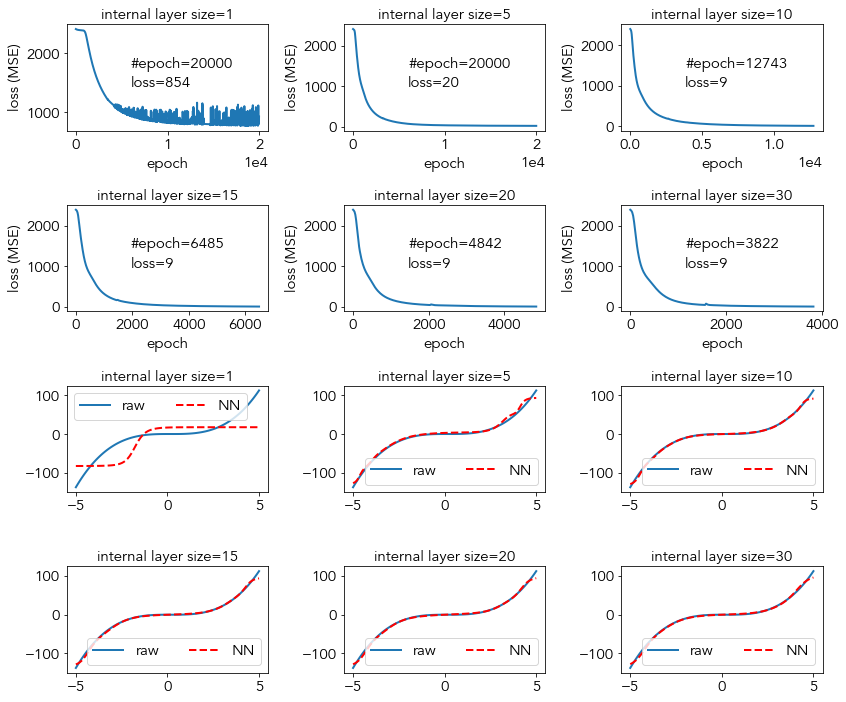

In [83]:
torch.manual_seed(2)
num_layers = 3;

(n_epoch_list2,time_list2) = main_training(num_layers, learningRate, MAX_iter,1); 

In [84]:
torch.manual_seed(1)

num_layers = 3;
n_epoch_list2 = np.zeros((10,6));
time_list2 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list2[n],time_list2[n]) = main_training(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=1147
layers_size=5
#epoch=16573; loss=9
layers_size=10
#epoch=8027; loss=9
layers_size=15
#epoch=5466; loss=9
layers_size=20
#epoch=4480; loss=9
layers_size=30
#epoch=4353; loss=9
layers_size=1
#epoch=20000; loss=771
layers_size=5
#epoch=20000; loss=23
layers_size=10
#epoch=8377; loss=9
layers_size=15
#epoch=5527; loss=9
layers_size=20
#epoch=4677; loss=9
layers_size=30
#epoch=3826; loss=9
layers_size=1
#epoch=20000; loss=822
layers_size=5
#epoch=17031; loss=9
layers_size=10
#epoch=8125; loss=9
layers_size=15
#epoch=5902; loss=9
layers_size=20
#epoch=4501; loss=9
layers_size=30
#epoch=3780; loss=9
layers_size=1
#epoch=20000; loss=1051
layers_size=5
#epoch=16005; loss=9
layers_size=10
#epoch=7382; loss=9
layers_size=15
#epoch=5958; loss=9
layers_size=20
#epoch=5046; loss=9
layers_size=30
#epoch=4019; loss=9
layers_size=1
#epoch=20000; loss=1164
layers_size=5
#epoch=15562; loss=9
layers_size=10
#epoch=6847; loss=9
layers_size=15
#epoch=5405; loss=9
layers

<Figure size 360x288 with 0 Axes>

In [85]:
print(np.mean(n_epoch_list2,axis=0))
print(np.mean(time_list2,axis=0))

[20000.  17004.2  7726.8  6334.4  5149.6  3777.4]
[9.74108338 8.78661621 3.95067263 3.26819527 2.74161172 2.04412405]


### test on 4-layer network

layers_size=1
#epoch=20000; loss=922
layers_size=5
#epoch=20000; loss=17
layers_size=10
#epoch=14401; loss=9
layers_size=15
#epoch=13445; loss=10
layers_size=20
#epoch=6065; loss=9
layers_size=30
#epoch=4740; loss=9


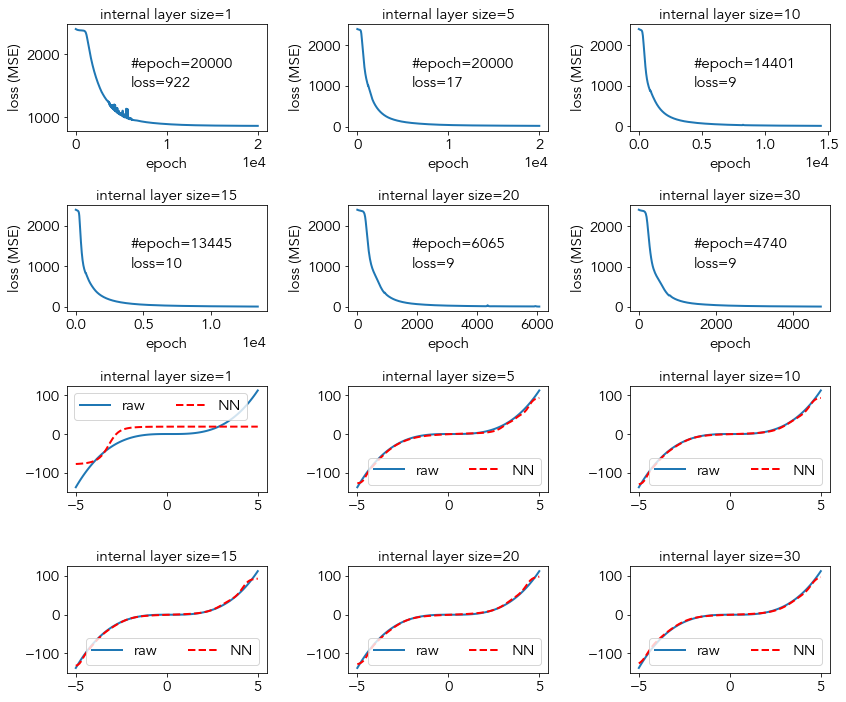

In [86]:
torch.manual_seed(1)
num_layers = 4;

(n_epoch_list3,time_list3) = main_training(num_layers, learningRate, MAX_iter,1); 

In [87]:
torch.manual_seed(1)

num_layers = 4;
n_epoch_list3 = np.zeros((10,6));
time_list3 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list3[n],time_list3[n]) = main_training(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=922
layers_size=5
#epoch=20000; loss=17
layers_size=10
#epoch=14401; loss=9
layers_size=15
#epoch=13445; loss=10
layers_size=20
#epoch=6065; loss=9
layers_size=30
#epoch=4740; loss=9
layers_size=1
#epoch=20000; loss=857
layers_size=5
#epoch=20000; loss=22
layers_size=10
#epoch=14193; loss=9
layers_size=15
#epoch=20000; loss=12
layers_size=20
#epoch=6904; loss=9
layers_size=30
#epoch=5161; loss=9
layers_size=1
#epoch=20000; loss=922
layers_size=5
#epoch=20000; loss=23
layers_size=10
#epoch=10888; loss=9
layers_size=15
#epoch=7891; loss=10
layers_size=20
#epoch=6543; loss=9
layers_size=30
#epoch=5148; loss=10
layers_size=1
#epoch=20000; loss=860
layers_size=5
#epoch=20000; loss=29
layers_size=10
#epoch=14272; loss=9
layers_size=15
#epoch=9519; loss=9
layers_size=20
#epoch=7571; loss=9
layers_size=30
#epoch=5125; loss=10
layers_size=1
#epoch=20000; loss=858
layers_size=5
#epoch=17223; loss=10
layers_size=10
#epoch=11008; loss=9
layers_size=15
#epoch=7920; 

<Figure size 360x288 with 0 Axes>

In [88]:
print(np.mean(n_epoch_list3,axis=0))
print(np.mean(time_list3,axis=0))

[20000.  19694.9 13722.9 10141.4  7050.7  5239.2]
[11.66830084 12.40483835  8.74761848  6.52016816  4.49259038  3.49409761]


### number of epochs needed to reach the target loss

## 3) explore number of layers and layer sizes with ReLU activation

In [97]:
class ReLuFeedForward(nn.Module): 
    def __init__(self,layers_size,num_layers): #default to one-dimensional feature and response
        super(ReLuFeedForward, self).__init__() #run init of torch.nn.Module
        self.layers_size = layers_size;
        self.num_layers = num_layers;
        self.layers = nn.ModuleList([nn.Linear(1, layers_size)])
        self.layers.extend([nn.Linear(layers_size, layers_size) for i in range(1, self.num_layers-1)])
        self.layers.append(nn.Linear(layers_size, 1))
        self.relu=torch.nn.ReLU()

    def forward(self, x):
        out = x
        for i in range(len(self.layers)-1):
            out = self.layers[i](out)
            out=self.relu(out)
        out = self.layers[-1](out)
        return out

In [98]:
def main_training_ReLu(num_layers, learningRate, MAX_iter, make_plot):
    n_epoch_list = [];
    time_list = [];
    
    if make_plot == 1:
        plt.figure(figsize=(12,10));
        j = 1;
    
    for layers_size in layer_size_list:
        print('layers_size='+str(layers_size))
        model=ReLuFeedForward(layers_size,num_layers)
        Loss = torch.nn.MSELoss(reduction='mean')
        optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #gradient descent
        tic=time.time();
        losses=np.array([])
        n_epoch = MAX_iter;
        for ctr in range(MAX_iter):
            optimizer.zero_grad()
            outputs = model(inputs)
            lossvalue = Loss(outputs, labels)
            losses = np.append(losses, lossvalue.detach().numpy())
            if (np.mean(losses[-100:])<10):
                n_epoch = ctr;
                break;
            else:
                lossvalue.backward()
                optimizer.step()
        toc=time.time();
        time_list.append(toc-tic); 
        n_epoch_list.append(n_epoch)
        print('#epoch='+str(n_epoch)+'; loss='+str(int(losses[-1])))  

        xdata = np.arange(0,n_epoch,20);
        ydata = losses[::20];
        min_len = min(len(xdata),len(ydata))
        xdata = xdata[0:min_len]
        ydata = ydata[0:min_len]
        if make_plot == 1:
            plt.subplot(4,3,j)
            plt.title('internal layer size='+str(layers_size))
            plt.text(0.3*n_epoch,0.6*(max(losses)-min(losses))+min(losses),'#epoch='+str(n_epoch))
            plt.text(0.3*n_epoch,0.4*(max(losses)-min(losses))+min(losses),'loss='+str(int(losses[-1])))
            plt.plot(xdata,ydata,**plotStyles)
            plt.xlabel('epoch')
            plt.ylabel('loss (MSE)')
        
            plt.subplot(4,3,6+j)
            outputs=model(inputs)
            plt.plot(x,y,linewidth=2,label='raw')
            plt.plot(inputs.detach().numpy(), outputs.detach().numpy(),'r--',linewidth=2,label='NN')
            plt.legend(ncol=2)
            plt.title('internal layer size='+str(layers_size))
        
            j = j+1;
        plt.tight_layout()
    return (n_epoch_list,time_list)
        

### test on 2-layer network

layers_size=1
#epoch=20000; loss=393
layers_size=5
#epoch=1942; loss=9
layers_size=10
#epoch=1337; loss=9
layers_size=15
#epoch=1304; loss=9
layers_size=20
#epoch=1329; loss=9
layers_size=30
#epoch=1311; loss=9


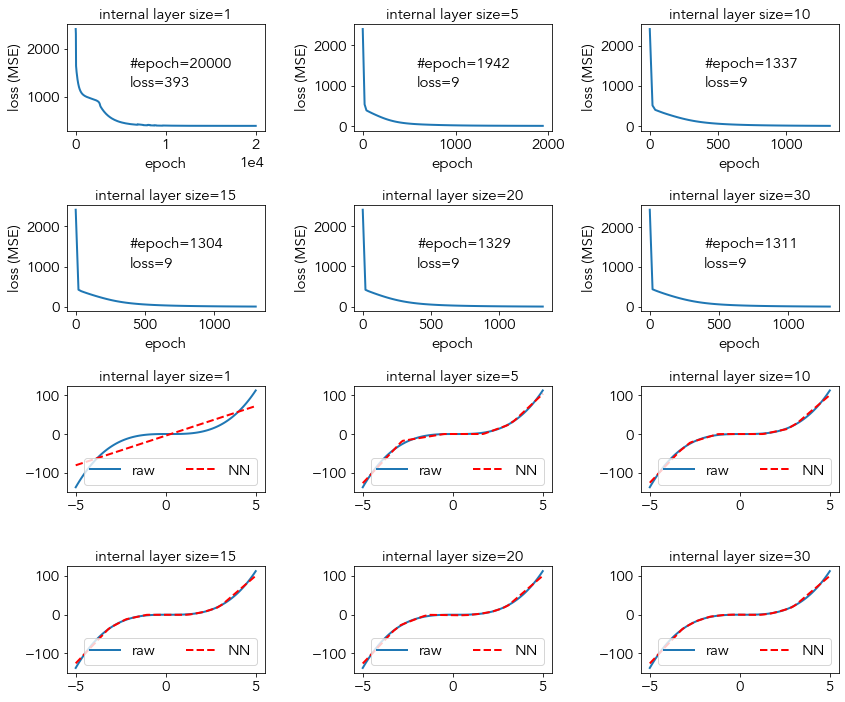

In [99]:
torch.manual_seed(1)
num_layers = 2;

(n_epoch_list4,time_list4) = main_training_ReLu(num_layers, learningRate, MAX_iter,1); 


In [100]:
torch.manual_seed(1)

num_layers = 2;
n_epoch_list4 = np.zeros((10,6));
time_list4 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list4[n],time_list4[n]) = main_training_ReLu(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=393
layers_size=5
#epoch=1942; loss=9
layers_size=10
#epoch=1337; loss=9
layers_size=15
#epoch=1304; loss=9
layers_size=20
#epoch=1329; loss=9
layers_size=30
#epoch=1311; loss=9
layers_size=1
#epoch=20000; loss=393
layers_size=5
#epoch=20000; loss=18
layers_size=10
#epoch=1370; loss=9
layers_size=15
#epoch=1349; loss=9
layers_size=20
#epoch=1303; loss=9
layers_size=30
#epoch=1293; loss=9
layers_size=1
#epoch=20000; loss=657
layers_size=5
#epoch=20000; loss=200
layers_size=10
#epoch=1319; loss=9
layers_size=15
#epoch=1311; loss=9
layers_size=20
#epoch=1367; loss=9
layers_size=30
#epoch=1276; loss=9
layers_size=1
#epoch=20000; loss=393
layers_size=5
#epoch=4041; loss=9
layers_size=10
#epoch=1422; loss=9
layers_size=15
#epoch=1410; loss=9
layers_size=20
#epoch=1310; loss=9
layers_size=30
#epoch=1298; loss=9
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=13
layers_size=10
#epoch=3293; loss=9
layers_size=15
#epoch=1328; loss=9
layers_

<Figure size 360x288 with 0 Axes>

In [101]:
print(np.mean(n_epoch_list4,axis=0))
print(np.mean(time_list4,axis=0))

[20000.  11836.7  1802.9  1323.4  1317.5  1292. ]
[7.37193947 4.51204486 0.6646888  0.48946929 0.49465344 0.48323207]


### test on 3-layer network

layers_size=1
#epoch=20000; loss=835
layers_size=5
#epoch=20000; loss=29
layers_size=10
#epoch=2935; loss=6
layers_size=15
#epoch=2613; loss=10
layers_size=20
#epoch=2580; loss=6
layers_size=30
#epoch=2524; loss=9


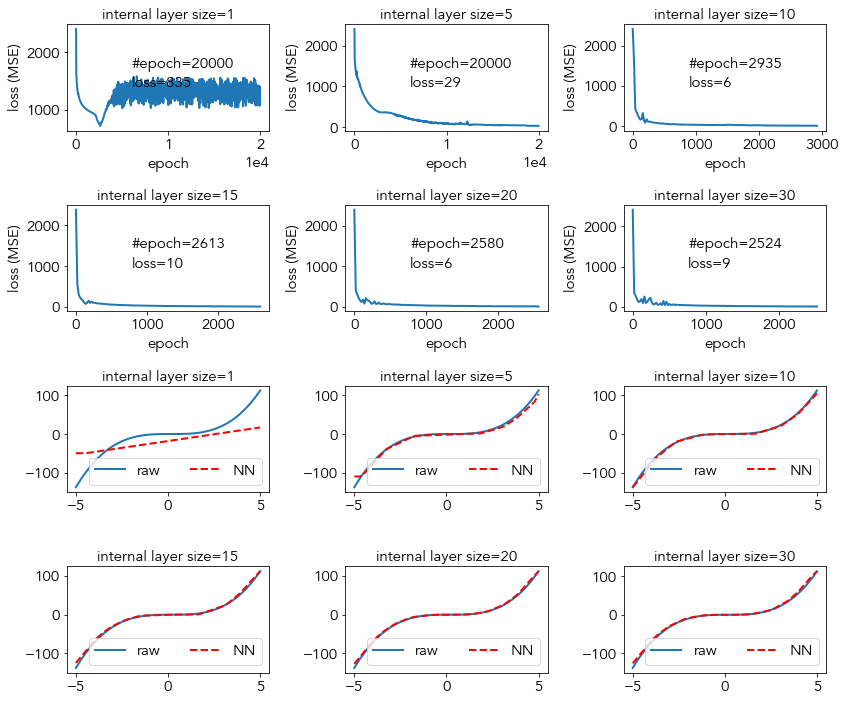

In [102]:
torch.manual_seed(2)
num_layers = 3;

(n_epoch_list5,time_list5) = main_training_ReLu(num_layers, learningRate, MAX_iter,1); 


In [103]:
torch.manual_seed(1)

num_layers = 3;
n_epoch_list5 = np.zeros((10,6));
time_list5 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list5[n],time_list5[n]) = main_training_ReLu(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=656
layers_size=5
#epoch=20000; loss=11
layers_size=10
#epoch=2613; loss=11
layers_size=15
#epoch=2847; loss=9
layers_size=20
#epoch=2420; loss=9
layers_size=30
#epoch=2486; loss=9
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=47
layers_size=10
#epoch=2573; loss=8
layers_size=15
#epoch=2503; loss=9
layers_size=20
#epoch=2349; loss=10
layers_size=30
#epoch=2609; loss=12
layers_size=1
#epoch=20000; loss=1188
layers_size=5
#epoch=20000; loss=56
layers_size=10
#epoch=2812; loss=9
layers_size=15
#epoch=3115; loss=9
layers_size=20
#epoch=2449; loss=7
layers_size=30
#epoch=2625; loss=9
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=8010; loss=7
layers_size=10
#epoch=2867; loss=12
layers_size=15
#epoch=2472; loss=9
layers_size=20
#epoch=2858; loss=7
layers_size=30
#epoch=2572; loss=10
layers_size=1
#epoch=20000; loss=1267
layers_size=5
#epoch=2595; loss=8
layers_size=10
#epoch=2963; loss=9
layers_size=15
#epoch=2374; loss=7


<Figure size 360x288 with 0 Axes>

In [104]:
print(np.mean(n_epoch_list5,axis=0))
print(np.mean(time_list5,axis=0))

[20000.  11086.2  2675.1  2621.5  2547.6  2583.6]
[9.43783448 5.54287708 1.39552937 1.39201348 1.31660905 1.33753176]


### test on 4-layer network

layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=15
layers_size=10
#epoch=9849; loss=8
layers_size=15
#epoch=9527; loss=9
layers_size=20
#epoch=7950; loss=9
layers_size=30
#epoch=8329; loss=9


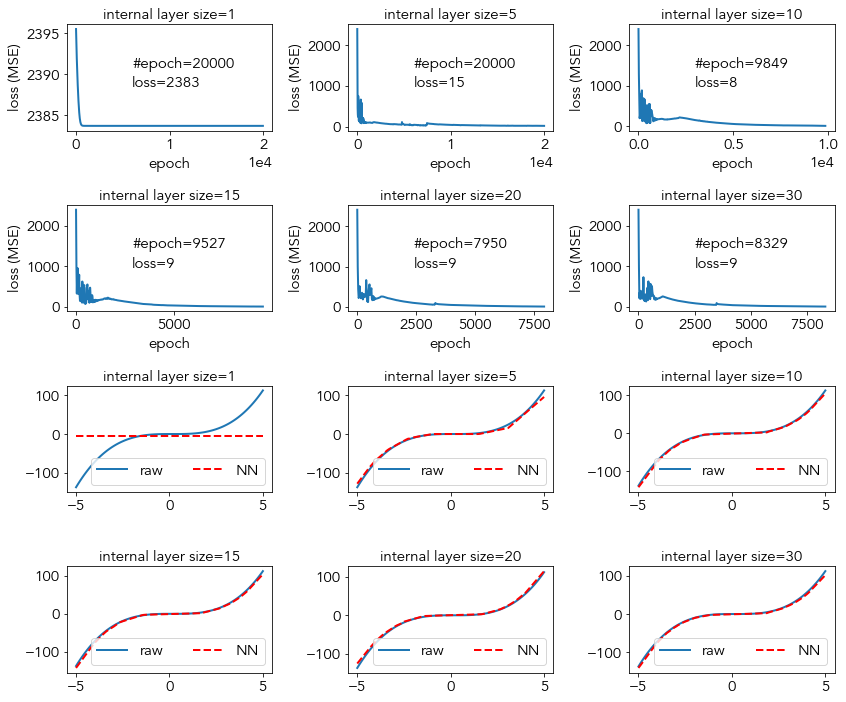

In [105]:
torch.manual_seed(2)
num_layers = 4;

(n_epoch_list6,time_list6) = main_training_ReLu(num_layers, learningRate, MAX_iter,1); 


In [106]:
torch.manual_seed(1)

num_layers = 4;
n_epoch_list6 = np.zeros((10,6));
time_list6 = np.zeros((10,6));

for n in range(10):
    (n_epoch_list6[n],time_list6[n]) = main_training_ReLu(num_layers, learningRate, MAX_iter,0); 

layers_size=1
#epoch=20000; loss=705
layers_size=5
#epoch=20000; loss=2383
layers_size=10
#epoch=9599; loss=10
layers_size=15
#epoch=9528; loss=8
layers_size=20
#epoch=7101; loss=8
layers_size=30
#epoch=8047; loss=9
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=12
layers_size=10
#epoch=11238; loss=10
layers_size=15
#epoch=9019; loss=8
layers_size=20
#epoch=7446; loss=8
layers_size=30
#epoch=7710; loss=10
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=13838; loss=9
layers_size=10
#epoch=9295; loss=9
layers_size=15
#epoch=7931; loss=9
layers_size=20
#epoch=8042; loss=9
layers_size=30
#epoch=8114; loss=9
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=18
layers_size=10
#epoch=11240; loss=9
layers_size=15
#epoch=8527; loss=8
layers_size=20
#epoch=10346; loss=10
layers_size=30
#epoch=9068; loss=8
layers_size=1
#epoch=20000; loss=2383
layers_size=5
#epoch=20000; loss=27
layers_size=10
#epoch=7617; loss=8
layers_size=15
#epoch=8590; 

<Figure size 360x288 with 0 Axes>

In [107]:
print(np.mean(n_epoch_list6,axis=0))
print(np.mean(time_list6,axis=0))

[20000.  18513.2 10440.3  8507.2  8545.1  7975.4]
[11.26645713 11.01506557  5.97257502  5.08799193  5.29871681  4.94504442]


## 4) summary

### comparison within sigmoidal NN

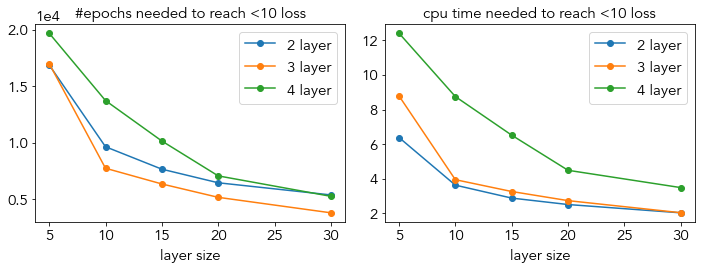

In [121]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(layer_size_list[1:],np.mean(n_epoch_list1,axis=0)[1:],'o-',label='2 layer')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list2,axis=0)[1:],'o-',label='3 layer')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list3,axis=0)[1:],'o-', label='4 layer')
plt.legend()
plt.xlabel('layer size')
plt.title('#epochs needed to reach <10 loss')

plt.subplot(1,2,2)
plt.plot(layer_size_list[1:],np.mean(time_list1,axis=0)[1:],'o-',label='2 layer')
plt.plot(layer_size_list[1:],np.mean(time_list2,axis=0)[1:],'o-',label='3 layer')
plt.plot(layer_size_list[1:],np.mean(time_list3,axis=0)[1:],'o-', label='4 layer')
plt.legend()
plt.xlabel('layer size')
plt.title('cpu time needed to reach <10 loss')

plt.tight_layout()

### comparison within ReLU NN 

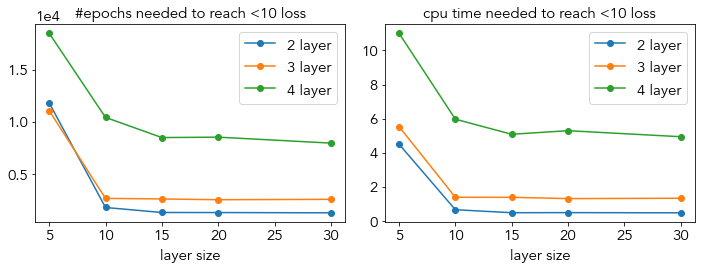

In [119]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(layer_size_list[1:],np.mean(n_epoch_list4,axis=0)[1:],'o-',label='2 layer')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list5,axis=0)[1:],'o-',label='3 layer')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list6,axis=0)[1:],'o-', label='4 layer')
plt.legend()
plt.xlabel('layer size')
plt.title('#epochs needed to reach <10 loss')

plt.subplot(1,2,2)
plt.plot(layer_size_list[1:],np.mean(time_list4,axis=0)[1:],'o-',label='2 layer')
plt.plot(layer_size_list[1:],np.mean(time_list5,axis=0)[1:],'o-',label='3 layer')
plt.plot(layer_size_list[1:],np.mean(time_list6,axis=0)[1:],'o-', label='4 layer')
plt.legend()
plt.xlabel('layer size')
plt.title('cpu time needed to reach <10 loss')

plt.tight_layout()

### cpu time needed to reach the target loss

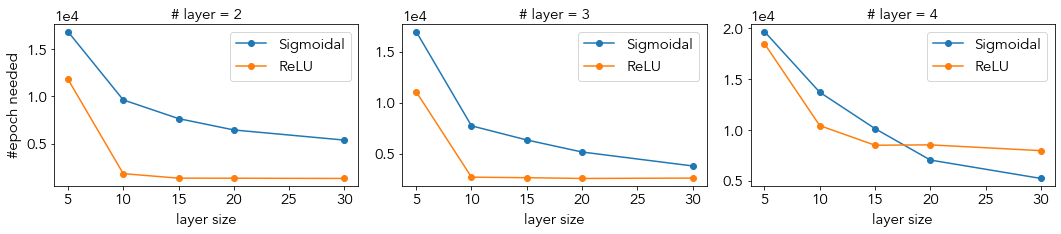

In [115]:
plt.figure(figsize=(15,3.5))
plt.subplot(1,3,1)
plt.title('# layer = 2')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list1,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list4,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')
plt.ylabel('#epoch needed')

plt.subplot(1,3,2)
plt.title('# layer = 3')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list2,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list5,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')

plt.subplot(1,3,3)
plt.title('# layer = 4')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list3,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(n_epoch_list6,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')

plt.tight_layout()

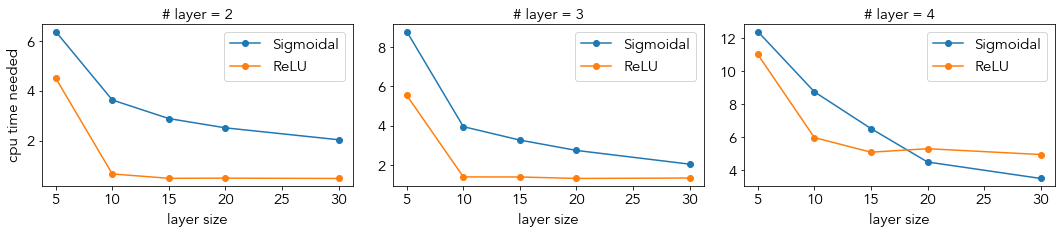

In [116]:
plt.figure(figsize=(15,3.5))
plt.subplot(1,3,1)
plt.title('# layer = 2')
plt.plot(layer_size_list[1:],np.mean(time_list1,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(time_list4,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')
plt.ylabel('cpu time needed')

plt.subplot(1,3,2)
plt.title('# layer = 3')
plt.plot(layer_size_list[1:],np.mean(time_list2,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(time_list5,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')

plt.subplot(1,3,3)
plt.title('# layer = 4')
plt.plot(layer_size_list[1:],np.mean(time_list3,axis=0)[1:],'o-',label='Sigmoidal')
plt.plot(layer_size_list[1:],np.mean(time_list6,axis=0)[1:],'o-',label='ReLU')
plt.legend()
plt.xlabel('layer size')

plt.tight_layout()